MAKİNE ÖĞRENMESİ PROJE ÖDEVİ - ŞARAP KALİTE SKORU TAHMİNİ - SINIFLANDIRMA

G211210006 BERKEHAN UYGUR<br>
G211210004 RAMAZAN SEFA KURTULUŞ<br>
G211210018 MEHMET OK<br>

Dataset kaggle linki: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
Bu veri seti, Portekiz "Vinho Verde" cinsi kırmızı şaraplarla ilgilidir. Veri seti, şarapta bulunan çeşitli kimyasalların miktarını ve bunların şarap kalitesi üzerindeki etkilerini açıklamaktadır. Veri kümeleri sınıflandırma veya regresyon problemi olarak görülebilir. 

Girdi değişkenleri (float):
1 - sabit asitlik
2 - uçucu asitlik
3 - sitrik asit
4 - artık şeker
5 - klorürler
6 - serbest kükürt dioksit
7 - toplam kükürt dioksit
8 - yoğunluk
9 - pH
10 - sülfat
11 - alkol

Çıkış değişkeni (int):
12 - kalite (0 ile 10 arasında puan)

Veri boyutu: 1143 , 12 özellik
Dengesiz sınıf dağılımı

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_raw = pd.read_csv("../data/WineQT.csv")
class_count = data_raw['quality'].value_counts()

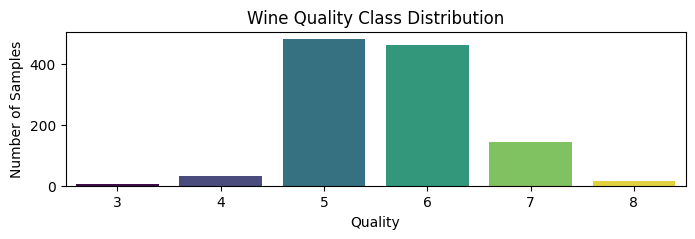

In [21]:
plt.figure(figsize=(8, 2))
sns.barplot(x=class_count.index, y=class_count.values, hue=class_count.index, palette="viridis", legend=False)
plt.title("Wine Quality Class Distribution")
plt.xlabel("Quality")
plt.ylabel("Number of Samples")
plt.show()

In [22]:
data_raw["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [23]:
missing_values = data_raw.isnull().sum()
print(missing_values)


#EKSİK VERİMİZ YOK, FAKAT ALTTAKİ GRAFİKLERDE GÖRÜLDÜĞÜ ÜZERE BAZI ÖZELLİKLERDE AYKIRI DEĞERLER VAR

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


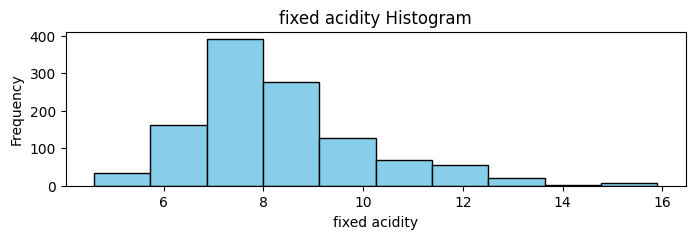

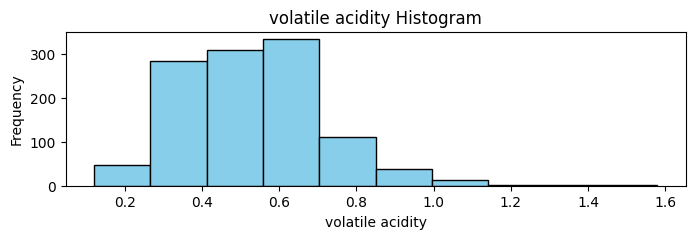

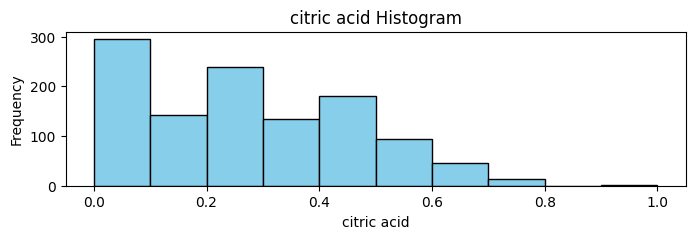

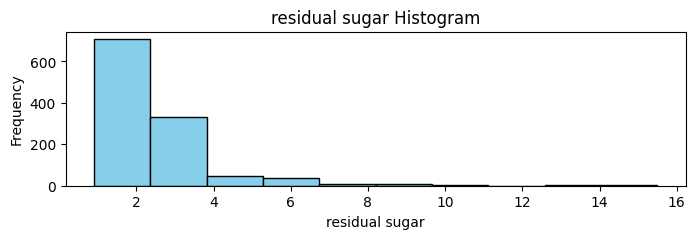

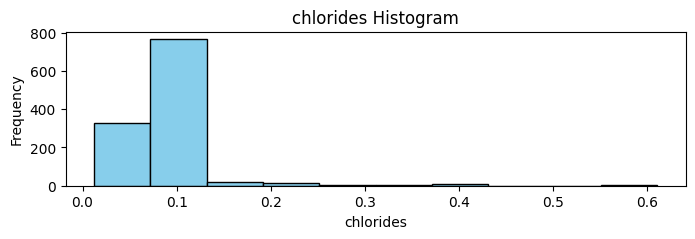

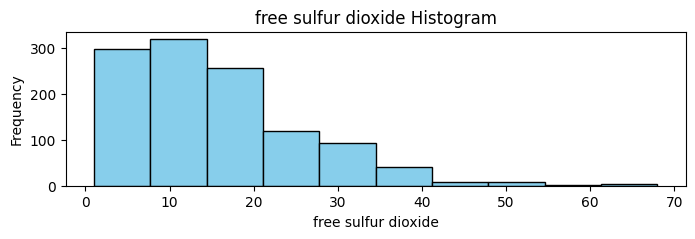

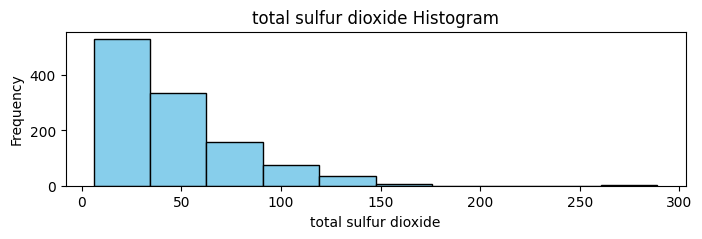

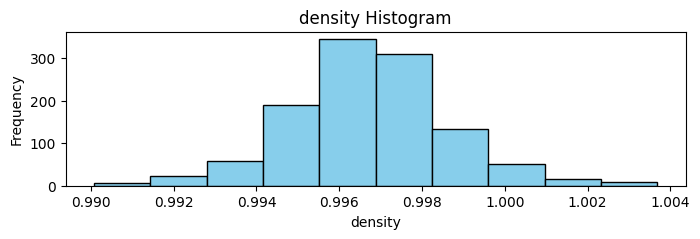

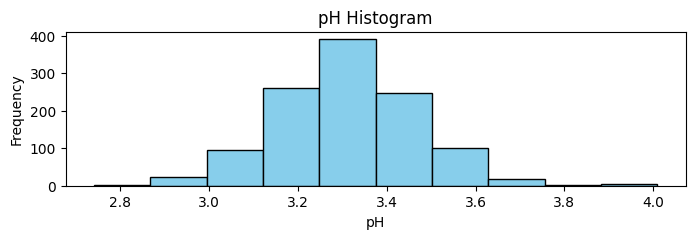

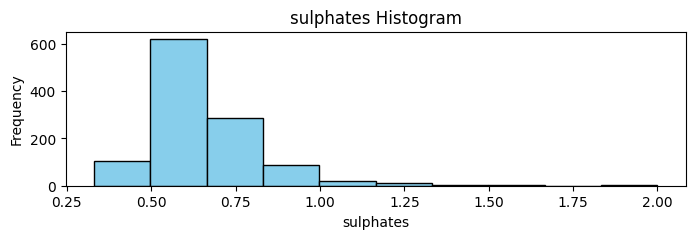

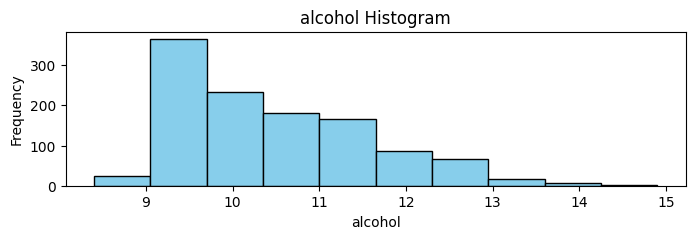

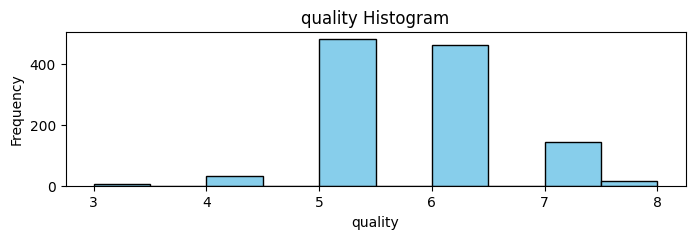

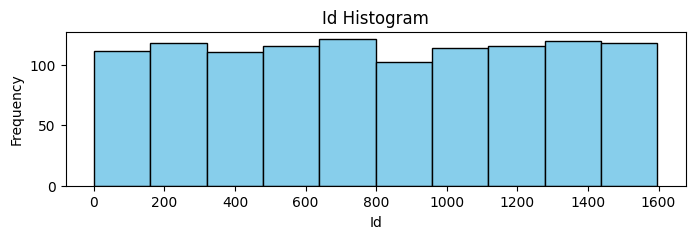

In [24]:
#AYKIRI DEĞERE SAHİP ÖZELLİKLERİ BELİRLEYELİM
numerical_columns = data_raw.select_dtypes(include=['float64', 'int64']).columns

# Her sütun için histogram çizme
for column in numerical_columns:
    plt.figure(figsize=(8, 2))
    plt.hist(data_raw[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

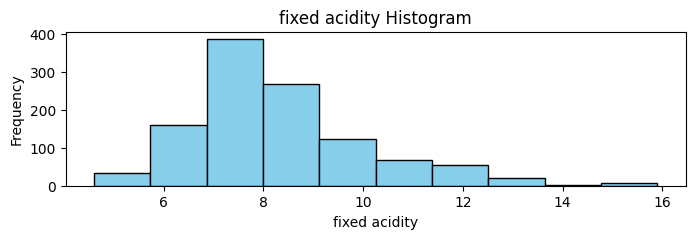

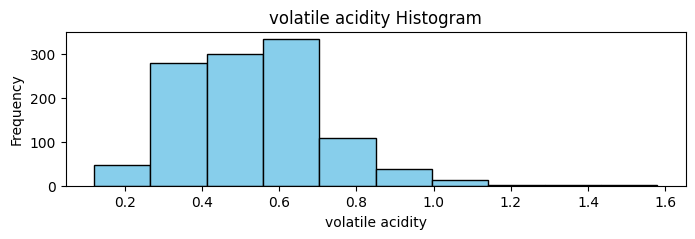

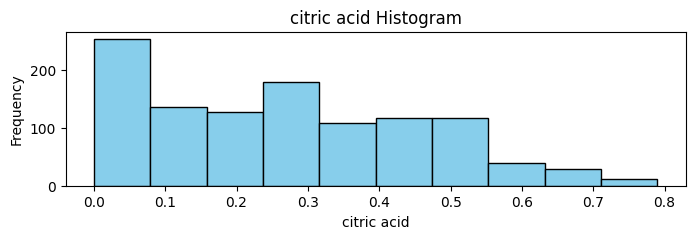

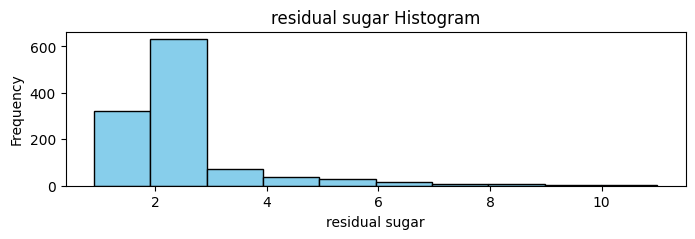

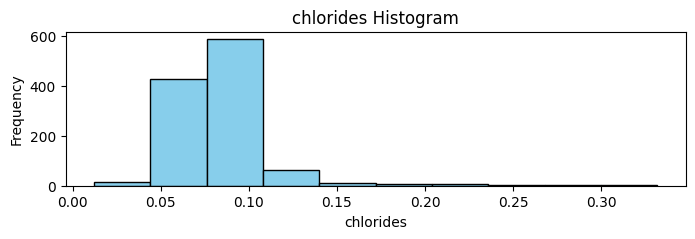

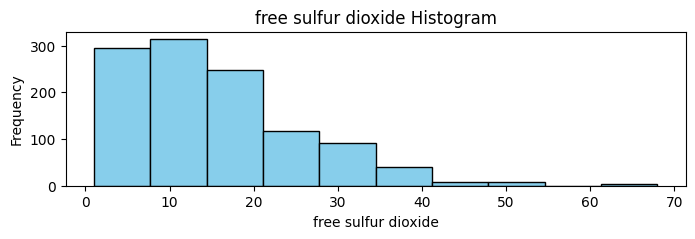

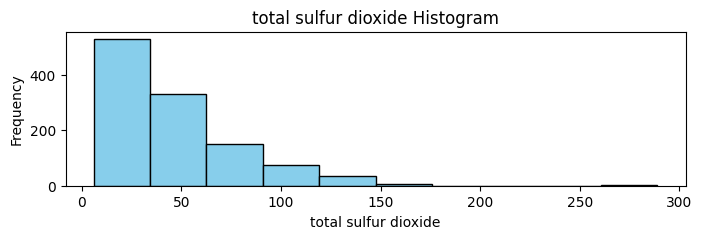

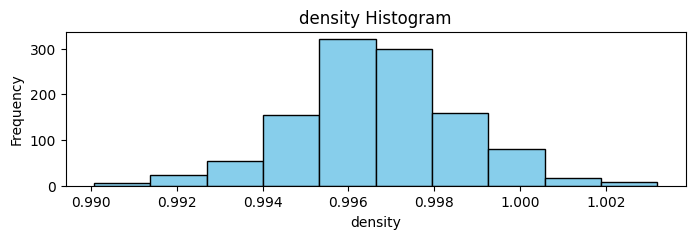

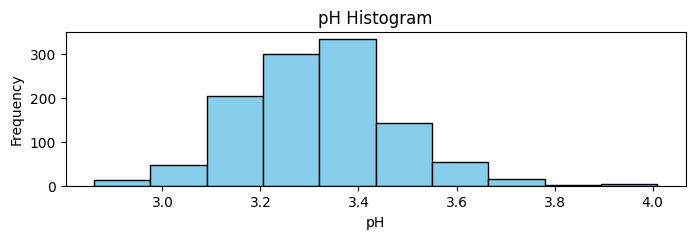

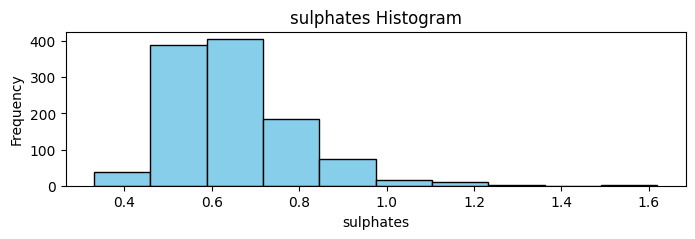

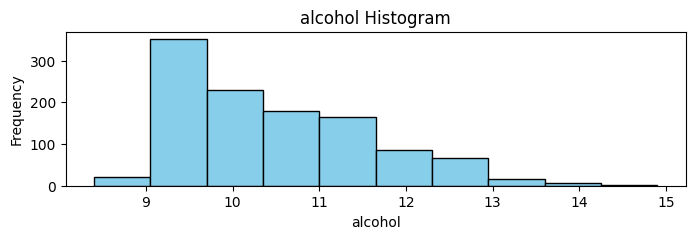

In [25]:
outliers = data_raw.drop(columns=['quality','Id']).columns  # Bu özellikler aykırı değerlere sahip

for column in outliers:
    Q1 = data_raw[column].quantile(0.05)
    Q3 = data_raw[column].quantile(0.97)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Aykırı değerleri filtrele (sil)
    data_raw = data_raw[(data_raw[column] >= lower_bound) & (data_raw[column] <= upper_bound)]

x= data_raw.drop(columns=['quality','Id'])
y=data_raw['quality']
numerical_columns = x.select_dtypes(include=['float64', 'int64']).columns

# Her sütun için histogram çizme
for column in numerical_columns:
    plt.figure(figsize=(8, 2))
    plt.hist(x[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

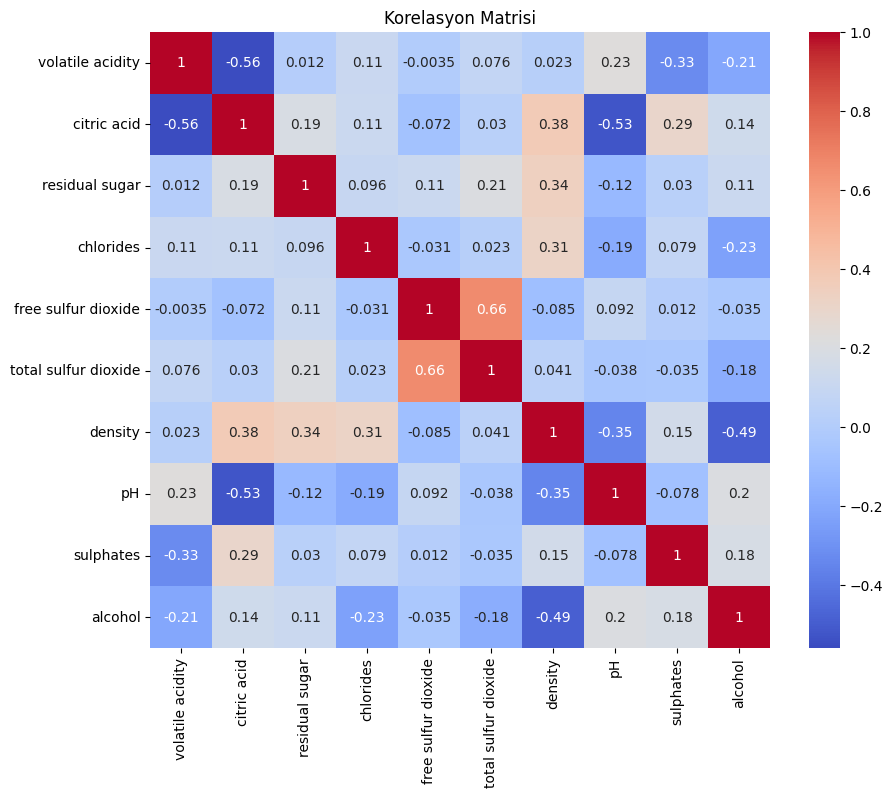

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.934479,-1.362991,-0.515859,-0.244468,-0.445262,-0.353776,0.575919,1.268340,-0.604471,-0.984131
1,1.933741,-1.362991,0.089616,0.606931,0.934809,0.655779,0.050634,-0.755527,0.221262,-0.613618
2,1.267566,-1.155777,-0.169874,0.374731,-0.050956,0.258076,0.155691,-0.363811,0.014828,-0.613618
3,-1.397133,1.538007,-0.515859,-0.283168,0.146197,0.441631,0.680975,-1.016672,-0.466849,-0.613618
4,0.934479,-1.362991,-0.515859,-0.244468,-0.445262,-0.353776,0.575919,1.268340,-0.604471,-0.984131


In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

x=x.drop(columns=['fixed acidity'],axis=1)
# StandardScaler ile standardizasyon
scaler = StandardScaler()
data_standardized = pd.DataFrame(
    scaler.fit_transform(x),
    columns=x.columns
)

# Korelasyon matrisini hesaplama
correlation_matrix = pd.DataFrame(
    data=data_standardized, columns=x.columns
).corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, xticklabels=x.columns, yticklabels=x.columns)
plt.title("Korelasyon Matrisi")
plt.show()
data_standardized.head()

In [27]:
y_labeled =  np.where((y >= 3) & (y <= 5), 0, 1)
print(y_labeled)


[0 0 0 ... 0 1 0]


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data_standardized, y_labeled, test_size=0.2, random_state=42)

# model = LogisticRegression()
# model.fit(X_train, y_train)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Modelin Doğruluğu:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Modelin Doğruluğu: 0.68

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.68      0.59      0.64       106
           1       0.68      0.76      0.71       119

    accuracy                           0.68       225
   macro avg       0.68      0.68      0.68       225
weighted avg       0.68      0.68      0.68       225

